In [12]:
#reading the data
import pandas as pd

btc_blockchain_data = pd.read_csv("cryptoCompareData/btc_blockchain_data.csv", thousands=',')
btc_prices= pd.read_csv("cryptoCompareData/btc_prices.csv", thousands=',')
btc_social = pd.read_csv("cryptoCompareData/btc_social.csv", thousands=',')

In [157]:
btc_info = btc_prices\
    .merge(btc_blockchain_data, on='time', how='outer')\
    .merge(btc_social,on="time",how='outer')\
    .sort_values('time')\
    .dropna(subset=['close'])
btc_info['time'] = pd.to_datetime(btc_info['time'])
btc_info.set_index(btc_info['time']);

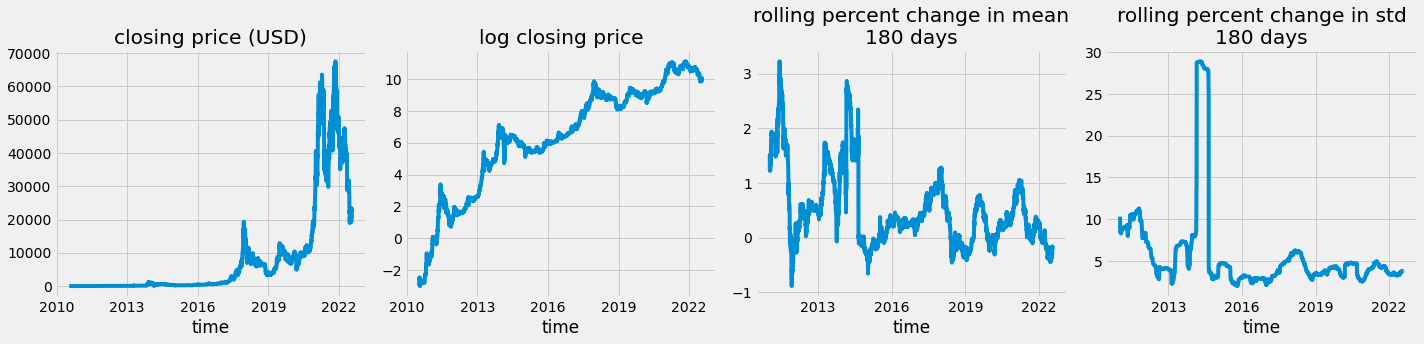

In [169]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use('fivethirtyeight')
def plot_yearly(ax,time : pd.Series , target : pd.Series, title:str):
    sns.lineplot(x=time,y=target.values,ax=ax)
    ax.xaxis.set_major_locator(mdates.YearLocator(3))
    ax.set_title(title)
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))


fig,axes = plt.subplots(1,4,figsize=(20,5))
plot_yearly(axes[0],btc_info['time'],btc_info['close'],'closing price (USD)')
plot_yearly(axes[1],btc_info['time'],np.log(btc_info['close']), 'log closing price')
plot_yearly(axes[2],btc_info['time'],(btc_info['close'].pct_change() * 100).rolling(180).mean(), "rolling percent change in mean\n180 days")
plot_yearly(axes[3],btc_info['time'],(btc_info['close'].pct_change() * 100).rolling(180).std(), "rolling percent change in std dev\n180 days")
plt.tight_layout()

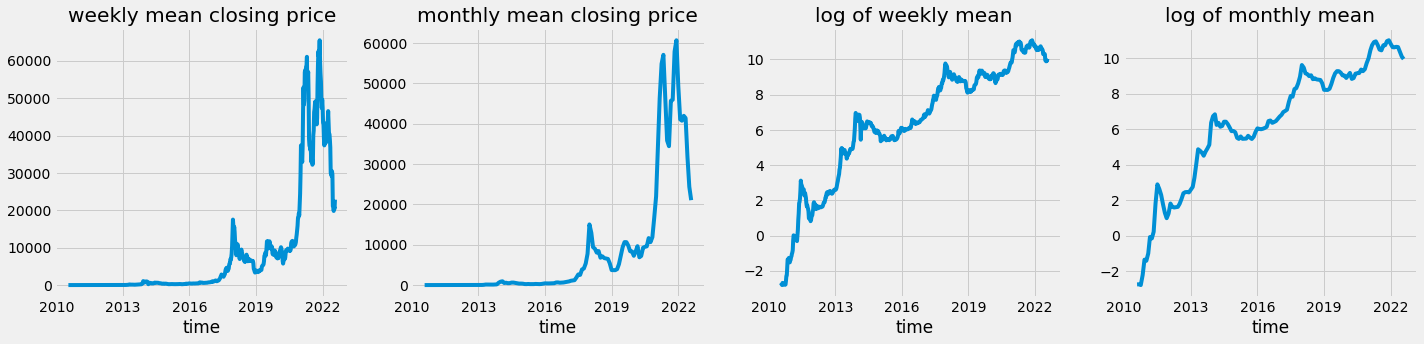

In [191]:
fig,axes = plt.subplots(1,4,figsize=(20,5))
weekly_mean = btc_info.groupby([pd.Grouper(key='time', freq='W')])['close']\
    .mean()\
    .reset_index()\
    .sort_values('time')

monthly_mean = btc_info.groupby([pd.Grouper(key='time', freq='M')])['close']\
    .mean()\
    .reset_index()\
    .sort_values('time')

log_weekly_mean = np.log(weekly_mean['close'])
log_monthly_mean = np.log(monthly_mean['close'])

plot_yearly(axes[0],weekly_mean['time'],weekly_mean['close'],'weekly mean closing price')
plot_yearly(axes[1],monthly_mean['time'],monthly_mean['close'], 'monthly mean closing price')
plot_yearly(axes[2],weekly_mean['time'],log_weekly_mean, "log of weekly mean")
plot_yearly(axes[3],monthly_mean['time'],log_monthly_mean, "log of monthly mean")
plt.tight_layout()

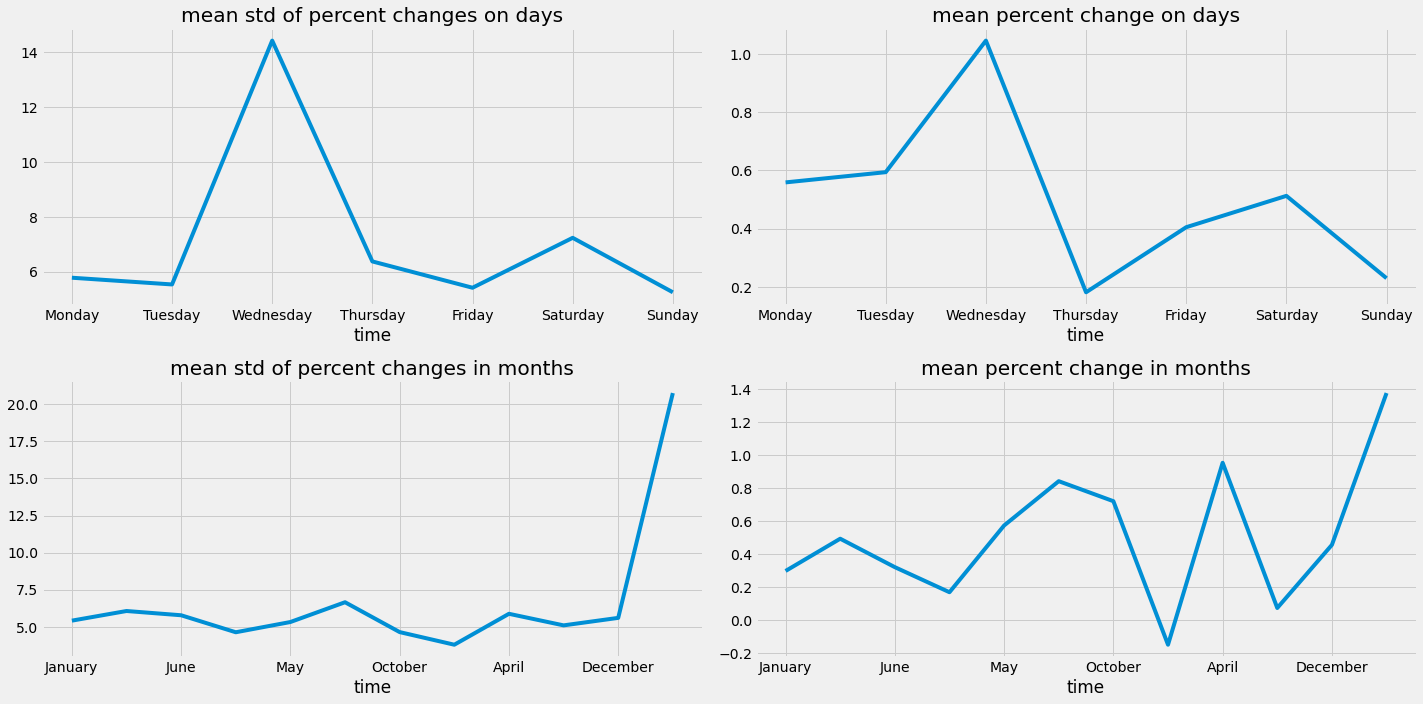

In [235]:
fig,axes = plt.subplots(2,2,figsize=(20,10))
btc_info["close_pct_change"] = btc_info['close'].pct_change()*100
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
btc_info.groupby(btc_info['time'].dt.day_name())['close_pct_change'].std().reindex(days).plot(ax=axes[0][0],title="mean std of percent changes on days")

btc_info.groupby(btc_info['time'].dt.day_name())['close_pct_change'].mean().reindex(days).plot(ax=axes[0][1],title='mean percent change on days')

months = ["January","July","June","March","May","November","October","September","April","August","December","February"]
btc_info.groupby(btc_info['time'].dt.month_name())['close_pct_change'].std().reindex(months).plot(ax=axes[1][0],title="mean std of percent changes in months")

btc_info.groupby(btc_info['time'].dt.month_name())['close_pct_change'].mean().reindex(months).plot(ax=axes[1][1],title='mean percent change in months')
plt.tight_layout()

#### Correlations

In [262]:
btc_info['close_shifted'] = btc_info['close'].shift(-1)
    btc_info.diff().corr()[['close_shifted','close']].sort_values('close_shifted',ascending=False)

,close_shifted,close
close_shifted,1.000000,-0.035045
USDTradedToBTC,0.067888,-0.173868
reddit_active_users,0.059810,-0.049573
hashrate,0.044701,0.003655
reddit_comments_per_day,0.042395,-0.113261
reddit_comments_per_hour,0.042395,-0.113261
zero_balance_addresses_all_time,0.034878,-0.049962
reddit_subscribers,0.030750,-0.024559
BTCTradedToUSD,0.020890,-0.080233
large_transaction_count,0.020392,0.021185


In [260]:
btc_info[['close_shifted','close']]

,close_shifted,close
0,0.08584,0.04951
1,0.08080,0.08584
2,0.07474,0.08080
3,0.07921,0.07474
4,0.05050,0.07921
...,...,...
4385,23222.77000,23399.91000
4386,23153.54000,23222.77000
4387,22686.32000,23153.54000
4388,22137.81000,22686.32000
